In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-music/Popular_Spotify_Songs.csv


In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from wordcloud import WordCloud
import string

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotify-music/Popular_Spotify_Songs.csv


In [20]:
data = pd.read_csv('/kaggle/input/spotify-music/Popular_Spotify_Songs.csv', encoding='latin 1')
print(data.shape)
data.head().T

(953, 24)


,0,1,2,3,4
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny
artist_count,2,1,1,1,1
released_year,2023,2023,2023,2019,2023
released_month,7,3,6,8,5
released_day,14,23,30,23,18
in_spotify_playlists,553,1474,1397,7858,3133
in_spotify_charts,147,48,113,100,50
streams,141381703,133716286,140003974,800840817,303236322
in_apple_playlists,43,48,94,116,84


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [22]:
def is_number(val):
    try:
        float(val)
        return True
    except ValueError:
        return False

print(data.streams[~data.streams.apply(is_number)])

574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object


In [23]:
print(data.in_deezer_playlists[~data.in_deezer_playlists.apply(is_number)])

48     2,445
54     3,394
55     3,421
65     4,053
73     1,056
       ...  
761    2,453
762    2,430
871    6,720
893    1,315
910    7,827
Name: in_deezer_playlists, Length: 79, dtype: object


In [24]:
print(data.in_shazam_charts[~data.in_shazam_charts.apply(is_number)])

12    1,021
13    1,281
17    1,173
24    1,093
44    1,133
88    1,451
89    1,170
Name: in_shazam_charts, dtype: object


In [25]:
data.streams = data.streams.apply(lambda val: int(val) if is_number(val) else np.nan)
data.streams = data.streams.fillna(data.streams.mean()).astype(int)
data.in_shazam_charts = data.in_shazam_charts.apply(
    lambda val: int(val.replace(',','')) if isinstance(val, str) else np.nan)
data.in_deezer_playlists = data.in_deezer_playlists.apply(
    lambda val: int(val.replace(',', '')) if isinstance(val, str) else np.nan
)

In [26]:
data_description = pd.DataFrame({
    'Type': data.dtypes,
    'Qualitative/Quantitative': ['Qualitative' if var==object or col.find('released')>=0 else 'Quantitative' for var, col in zip(data.dtypes, data.columns)],
    'Uniques': [len(data[col].unique()) if dtype==object else '-' for col, dtype in zip(data.columns, data.dtypes)],
    'Min': [data[col].min() if dtype==int else '-' for col, dtype in zip(data.columns, data.dtypes)],
    'Max': [data[col].max() if dtype==int else '-' for col, dtype in zip(data.columns, data.dtypes)],
    'Avg':  [data[col].mean() if dtype==int else '-' for col, dtype in zip(data.columns, data.dtypes)],
    'Std': [data[col].std().round(1) if dtype==int else '-' for col, dtype in zip(data.columns, data.dtypes)], 
    'Missing': [data[col].isnull().sum() for col in data.columns]
}).sort_values(by='Qualitative/Quantitative')

data_description

,Type,Qualitative/Quantitative,Uniques,Min,Max,Avg,Std,Missing
track_name,object,Qualitative,943,-,-,-,-,0
artist(s)_name,object,Qualitative,645,-,-,-,-,0
released_year,int64,Qualitative,-,1930,2023,2018.238195,11.1,0
released_month,int64,Qualitative,-,1,12,6.033578,3.6,0
released_day,int64,Qualitative,-,1,31,13.930745,9.2,0
mode,object,Qualitative,2,-,-,-,-,0
key,object,Qualitative,12,-,-,-,-,95
instrumentalness_%,int64,Quantitative,-,0,91,1.581322,8.4,0
acousticness_%,int64,Quantitative,-,0,97,27.057712,26.0,0
energy_%,int64,Quantitative,-,9,97,64.279119,16.6,0


[Text(0, 0.5, 'Count'), Text(0, 0.5, 'Count'), Text(0, 0.5, 'Count')]

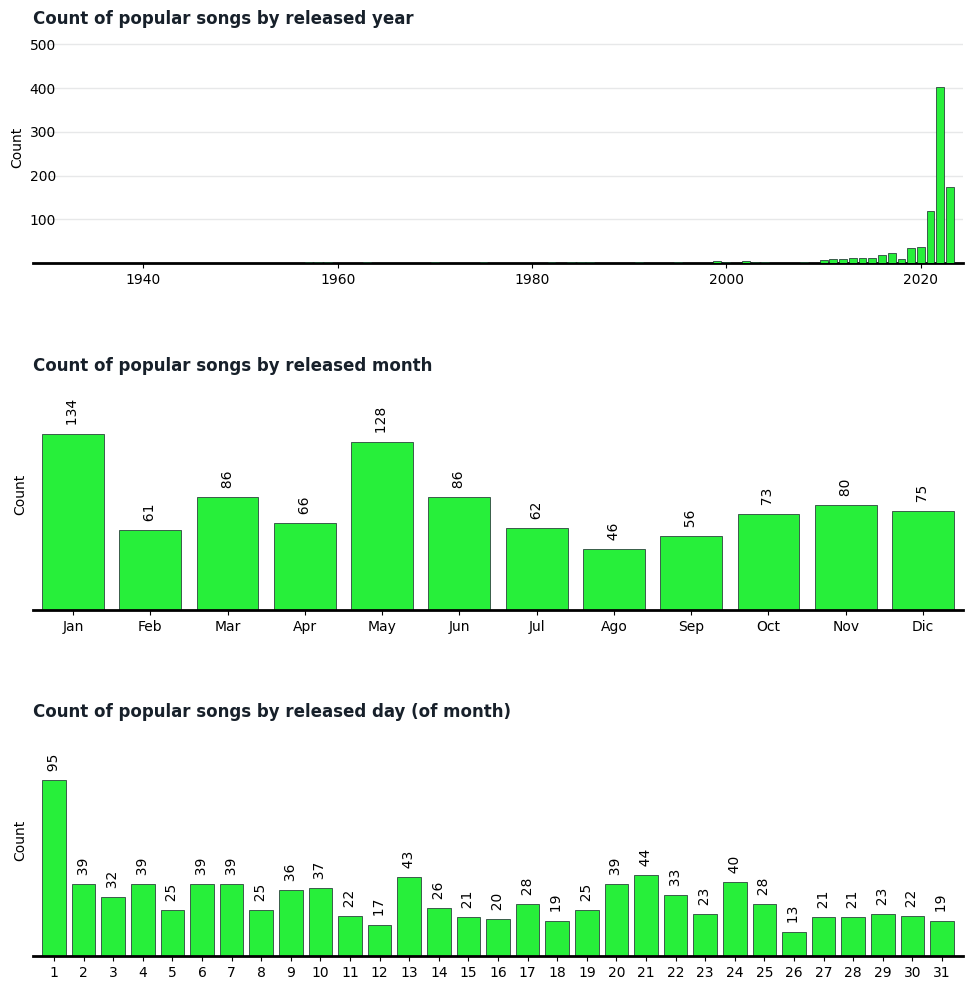

In [27]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

fig, ax = plt.subplots(3, 1, figsize=(12, 12))

ax[0].bar(data.released_year.value_counts().index,
          data.released_year.value_counts(), color='#27EF3A',  
          edgecolor='#17202A', lw=0.5, zorder=10)
bars1 = ax[1].bar(months,
                  data.released_month.value_counts().sort_index(), color='#27EF3A', 
                  edgecolor='#17202A', lw=0.5)
bars2 = ax[2].bar(data.released_day.value_counts().sort_index().index, 
                  data.released_day.value_counts().sort_index(), color='#27EF3A',
                  edgecolor='#17202A', lw=0.5)

for axi in ax:
    axi.margins(x=0.01)
    axi.spines[['left', 'right', 'top']].set_visible(False)
    axi.spines['bottom'].set_lw(2)
    axi.set_ylim(0, 1.25*axi.get_ylim()[-1])
for i, bar in enumerate(bars1 + bars2):
    axi = ax[1] if i < len(bars1) else ax[2]
    x, y = bar.get_x() + bar.get_width()/2, bar.get_height()
    axi.text(s=f'  {y}', x=x, y=y, rotation=90, ha='center', va='bottom');
    
plt.setp(ax[1:], yticks=[])
ax[0].grid(color='#17202A', alpha=0.1, lw=1, axis='y')
ax[2].xaxis.set_major_locator(plt.MultipleLocator(1))

ax[0].yaxis.set_major_locator(plt.MultipleLocator(100))
ax[0].tick_params(axis='y', left=False, pad=-20)
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda yi, ri: f'{yi:.0f}' if yi>0 else ''))

ax[0].set_title('Count of popular songs by released year', loc='left', 
                fontweight='bold', color='#17202A')
ax[1].set_title('Count of popular songs by released month', loc='left', 
                fontweight='bold', color='#17202A')
ax[2].set_title('Count of popular songs by released day (of month)', loc='left', 
                fontweight='bold', color='#17202A')
plt.subplots_adjust(hspace=0.5)
plt.setp(ax, ylabel='Count')

In [28]:
oldest_songs = (
    data[data.released_year<1960]\
    [['released_year', 'artist(s)_name', 'track_name']]
    .reset_index(drop=True)
    .sort_values(by='released_year')
)

oldest_songs

,released_year,artist(s)_name,track_name
0,1930,"Styrx, utku INC, Thezth",Agudo Mï¿½ï¿½gi
7,1942,"Bing Crosby, John Scott Trotter & His Orchestr...",White Christmas
5,1946,Nat King Cole,The Christmas Song (Merry Christmas To You) - ...
6,1950,"Frank Sinatra, B. Swanson Quartet",Let It Snow! Let It Snow! Let It Snow!
4,1952,Burl Ives,A Holly Jolly Christmas - Single Version
2,1957,Bobby Helms,Jingle Bell Rock
11,1957,Frank Sinatra,Jingle Bells - Remastered 1999
1,1958,Brenda Lee,Rockin' Around The Christmas Tree
8,1958,"Perry Como, The Fontane Sisters, Mitchell Ayre...",It's Beginning to Look a Lot Like Christmas (w...
10,1958,Chuck Berry,Run Rudolph Run - Single Version


Text(0.0, 1.0, 'Common words in oldest popular songs')

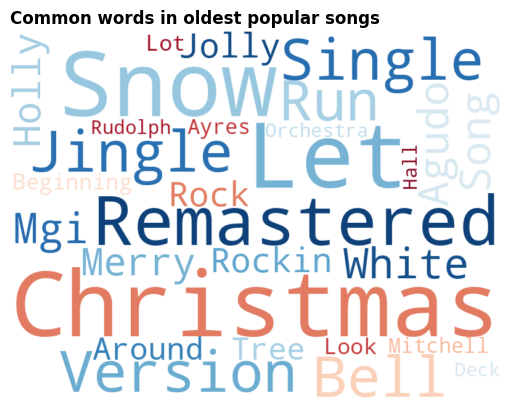

In [29]:
track_names = ' '.join(oldest_songs.track_name)
track_names = ''.join([char if char in string.ascii_letters + ' ' else '' for char in track_names])
track_names


# Crear una instancia de WordCloud
nube_palabras = WordCloud(background_color="white", max_words=200, width=800, height=600, 
                          colormap=plt.colormaps['RdBu'])

# Generar la nube de palabras
nube_palabras.generate(track_names.title())

# Mostrar la nube de palabras
plt.imshow(nube_palabras, interpolation="bilinear")
plt.axis("off")
plt.gca().set_title('Common words in oldest popular songs', loc='left', 
                    weight='bold')

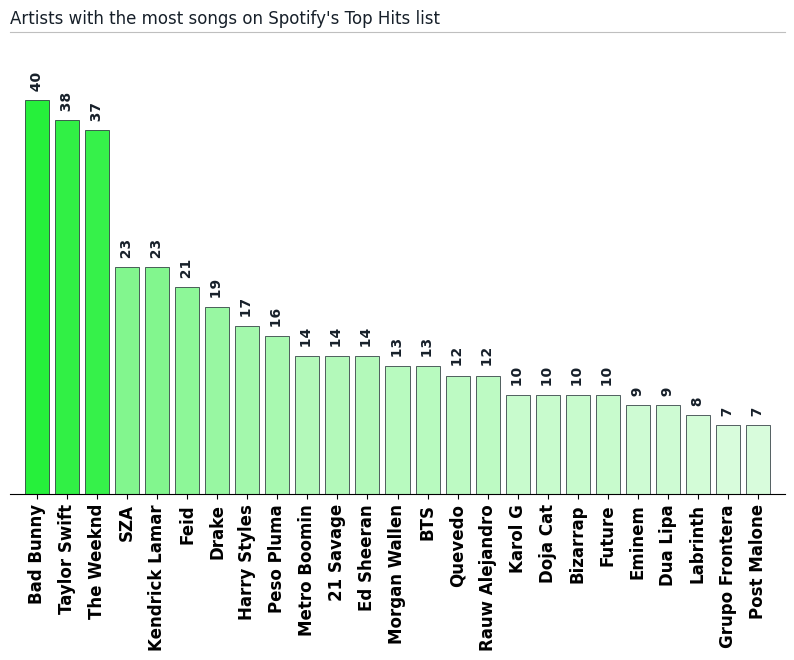

In [30]:
count_by_artist = count_by_artist = pd.Series(','.join(data['artist(s)_name']).split(',')).str.strip().value_counts().head(25)

fig, ax = plt.subplots(figsize=(10, 6))
ax.margins(x=0.02)

colors = [(.15, .94, .23, vi/count_by_artist.max()) 
          for vi in count_by_artist]
bars = ax.bar(count_by_artist.index, count_by_artist, 
              color=colors, edgecolor='#17202A', lw=0.5)
ax.tick_params(axis='x', rotation=90)
for label in ax.get_xticklabels():
    label.set(ha='right')
ax.spines[['right', 'left']].set_visible(False)
ax.spines['top'].set_alpha(0.25)
ax.set_yticks([])
for bar in bars:
    ax.annotate(
        f'  {bar.get_height():.0f}', 
        xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), 
        color='#17202A', 
        va='bottom', ha='center', rotation=90, 
        fontweight='bold'
    )
ax.set_title('Artists with the most songs on Spotify\'s Top Hits list', loc='left', 
             color='#17202A')
ax.set_ylim(0, ax.get_ylim()[1]+5)
for label in ax.get_xticklabels():
    label.set(fontsize=12, fontweight='bold', ha='center')

In [31]:
data.sort_values(by='artist_count', ascending=False).head(12)[['track_name',  'artist(s)_name', 'artist_count',]].reset_index(drop=True)

,track_name,artist(s)_name,artist_count
0,Se Le Ve,"Arcangel, De La Ghetto, Justin Quiles, Lenny T...",8
1,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8
2,"Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab...","Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½,...",7
3,We Don't Talk About Bruno,"Adassa, Mauro Castillo, Stephanie Beatriz, Enc...",7
4,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6
5,"Nobody Like U - From ""Turning Red""","Jordan Fisher, Josh Levi, Finneas O'Connell, 4...",6
6,"Besharam Rang (From ""Pathaan"")","Vishal-Shekhar, Shilpa Rao, Caralisa Monteiro,...",6
7,ULTRA SOLO REMIX,"De La Ghetto, Feid, Polima WestCoast, Paloma M...",5
8,Marisola - Remix,"Duki, NICKI NICOLE, Cris Mj, Standly, Stars Mu...",5
9,"Angel Pt 1 (feat. Jimin of BTS, JVKE & Muni Long)","Kodak Black, NLE Choppa, Muni Long, JVKE, Jimin",5


In [32]:
data['in_playlists_count'] = data.in_spotify_playlists +\
                             data.in_deezer_playlists +\
                             data.in_apple_playlists
data['in_charts_count'] = data.in_spotify_charts +\
                          data.in_deezer_charts +\
                          data.in_apple_charts
in_playlists_data = (
    data
    .sort_values(by='in_playlists_count', ascending=False)
    .head(15)
    [['track_name', 'artist(s)_name', 'in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists', 'in_playlists_count']]
)
in_playlists_data

,track_name,artist(s)_name,in_spotify_playlists,in_deezer_playlists,in_apple_playlists,in_playlists_count
624,Smells Like Teen Spirit - Remastered 2021,Nirvana,49991,12367,265,62623
757,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",52898,8215,203,61316
720,Wake Me Up - Radio Edit,Avicii,50887,6284,315,57486
630,Mr. Brightside,The Killers,51979,5063,306,57348
199,Take On Me,a-ha,44927,5108,34,50069
727,Somebody That I Used To Know,"Gotye, Kimbra",42798,6508,217,49523
871,Sweet Child O' Mine,Guns N' Roses,41231,6720,228,48179
55,Blinding Lights,The Weeknd,43899,3421,672,47992
162,One Dance,"Drake, WizKid, Kyla",43257,3631,433,47321
717,Bohemian Rhapsody - Remastered 2011,Queen,40112,5691,321,46124


Text(0.0, 1.0, 'Top songs by the total number of playlists they are included in')

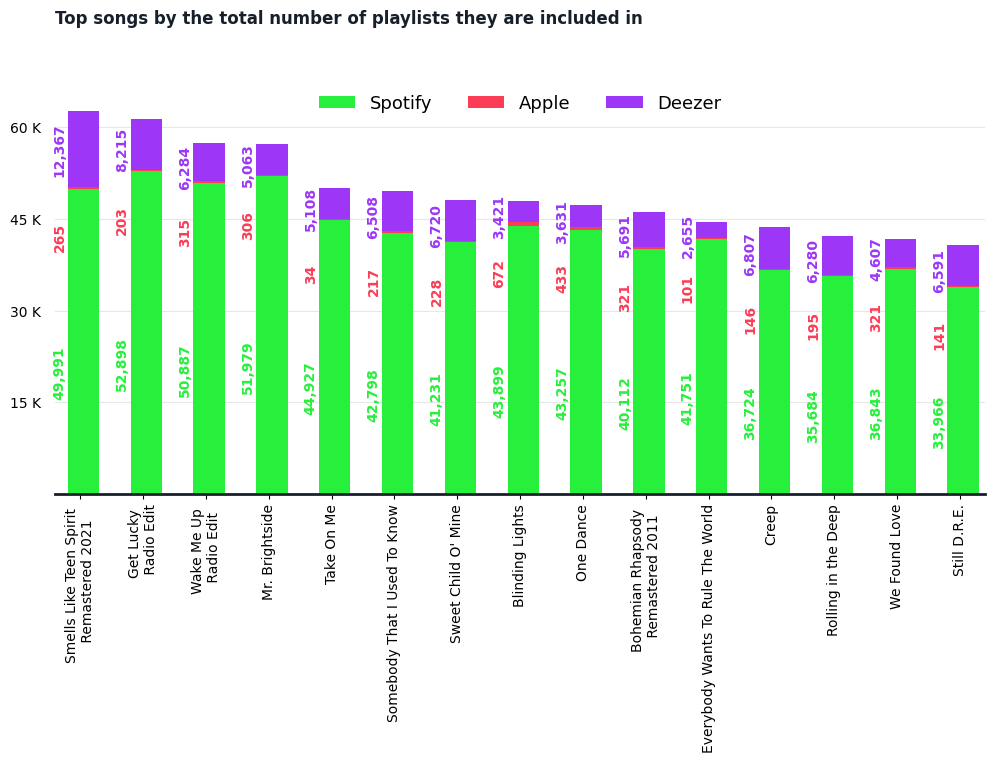

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.margins(x=0)
bars1 = ax.bar(in_playlists_data['track_name'].str.replace('-', '\n'), 
               in_playlists_data['in_spotify_playlists'], 
               color='#26F03B', 
               label='Spotify', zorder=5)
bars2 = ax.bar(in_playlists_data['track_name'].str.replace('-', '\n'), 
               in_playlists_data['in_apple_playlists'], 
               bottom=in_playlists_data['in_spotify_playlists'], 
               color='#FB3D56', 
               label='Apple', zorder=5)
bars3 = ax.bar(in_playlists_data['track_name'].str.replace('-', '\n'), 
               in_playlists_data['in_deezer_playlists'], 
               bottom= in_playlists_data['in_spotify_playlists'] + in_playlists_data['in_apple_playlists'], 
               color='#9D36F7', 
               label='Deezer', zorder=5)
ax.tick_params(axis='x', rotation=90, )
ax.legend(fontsize=13, ncols=3, loc='upper center', bbox_to_anchor=(0.5, 0.9), 
          fancybox=False, shadow=False, edgecolor='none')
ax.set_ylim(0, 1.15 * ax.get_ylim()[1])
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.spines['bottom'].set(lw=2, color='#17202A', zorder=10)
ax.tick_params(left=False)

for bar in bars1 + bars2 + bars3:
    bar.set_x(bar.get_x() + 0.2)
    bar.set_width(0.5)
    x = bar.get_x() - 0.02
    ycent = bar.get_y() + bar.get_height()/2
    color = bar.get_facecolor()
    val = bar.get_height()
    if bar in bars2:
        ycent -= 10000
    if bar in bars3:
        ycent -= 4000
    if bar in bars1:
        ycent -= 9000
    ax.annotate(f'{val:,}', xy=(x,ycent), color=color, 
                ha='right', rotation=90, fontweight='bold', va='baseline')
ax.grid(zorder=0, axis='y', alpha=0.3)
#ax.set_yticks([])
ax.set_yticks([15000, 30000, 45000, 60000], 
              ['15 K ', '30 K ', '45 K ', '60 K '])
ax.set_title('Top songs by the total number of playlists they are included in', 
             fontweight='bold', color='#17202A', loc='left')

Text(0.0, 1.0, 'Top tracks by number of strems')

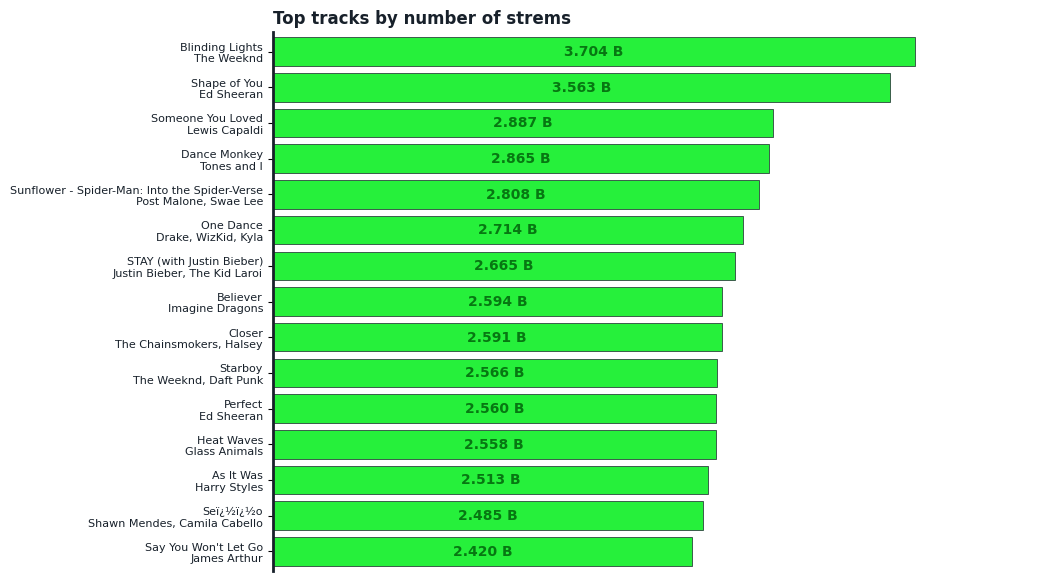

In [34]:
top_tracks_by_streams = (
    data.sort_values(by='streams', ascending=False)
    [['track_name', 'artist(s)_name', 'streams']]
    .head(15)
)

fig, ax = plt.subplots(figsize=(10, 7))
ax.margins(y=0.01)

bars = ax.barh(top_tracks_by_streams.track_name + '\n' + top_tracks_by_streams['artist(s)_name'],
               top_tracks_by_streams.streams,
              color='#26F03B', edgecolor='#17202A', lw=0.5)
ax.tick_params(axis='y', labelsize=8, labelcolor='#17202A')

ax.spines[['bottom', 'top', 'right']].set_visible(False)
ax.spines['left'].set(lw=2, color='#17202A', zorder=5)
ax.set_xlim(0, ax.get_xlim()[1]*1.15)
ax.set_ylim(reversed(ax.get_ylim()))
ax.set_xticks([])
for bar in bars:
    ax.annotate(
        text=f'{bar.get_width()/1_000_000_000:,.3f} B',
        xy = (bar.get_width()/2, bar.get_y() + bar.get_height()/2),
        ha='center', va='center', rotation=0, 
        color='#077712', fontweight='bold', 
        fontsize=10    )
ax.set_title('Top tracks by number of strems', color='#17202A', 
             fontweight='bold', loc='left')